# Background

PetMind is a retailer of products for pets. They are based in the United States.

PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.

The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.

They now want a report on how repeat purchases impact sales.

# Data and its characteristics

the dataset is given in the directory files.
The dataset contains the sales records in the stores last year.

_here are the data and their criteria._

- product_id (Nominal): The unique identifier of the product. Missing values are not possible due to the database structure.
- category (Nominal): The category of the product, one of 6 values (Housing,Food, Toys, Equipment, Medicine, Accessory). Missing values should be replaced with “Unknown”.
- animal (Nominal): The type of animal the product is for. One of Dog, Cat,Fish, Bird. Missing values should be replaced with “Unknown”.
- size (Ordinal): The size of animal the product is for. Small, Medium,Large. Missing values should be replaced with “Unknown”.
- price (Continuous): The price the product is sold at. Can be any positivevalue, round to 2 decimal places. Missing values should be replaced with the overall median price.
- sales (Continuous): The value of all sales of the product in the last year. This can be any positive value, rounded to 2 decimal places. Missing values should be replaced with the overall median sales.
- rating (Discrete): Customer rating of the product from 1 to 10. Missing values should be replaced with 0.
- repeat_purchase (Nominal): Whether customers repeatedly buy the product (1) or not (0); Missing values should be removed.




## Data exploration

In [1]:
import pandas as pd 
import numpy as np


In [2]:
data = pd.read_csv("pet_supplies_2212.csv") #load dataset
data

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [4]:
data.info() #data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
data.isna().sum() #missing values for every column

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64


State whether the values match the description given in the table above for every column in the data:

- Product_id: the values don't match to the description because it's suppoded to be nominal(categorical) when it's interger
- category: this column matches with the description
- animal: this column matches with the description
- size: this column matches with the description
- price: this column doesn't match with the description because values are supposed to be continuous when it's categorical
- sales:this column matches with the description
- rating:this column doesn't match with the description because values are supposed to be integers when it's float
- repeat_purchase:this column doesn't match with the description because values are supposed to be categorical when it's integer

## Data cleaning

In [6]:
#replace "unlisted" by NA in price column
data.price.replace('unlisted',np.nan,inplace=True)

In [7]:
#convert price values to continuous values anf replace NA by the median
data['price'] = data['price'].astype('float64').fillna(round(data.price.median(),2))

In [8]:
#convert rating values to discrete and fill NA with 0
data['rating']=data['rating'].fillna(0).astype(int)

In [9]:
#convert product_id,repeat_purchase,category, animal, size values to categorical
data=data.astype({"product_id":'category',"repeat_purchase":'category',"category":'category',"animal":'category',"size":'category'})

## Data validation

In [10]:
#check dataset to see if the changes have been done
data

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6,0
2,3,Food,Dog,medium,31.23,898.30,5,1
3,4,Medicine,Cat,small,24.95,982.15,6,1
4,5,Housing,Cat,Small,26.18,832.63,7,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5,0
1497,1498,Food,Fish,Small,25.79,724.02,3,0
1498,1499,Medicine,Fish,small,19.94,658.66,5,1


In [11]:
data.info() #checking again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   category
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   category
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1500 non-null   int32   
 7   repeat_purchase  1500 non-null   category
dtypes: category(5), float64(2), int32(1)
memory usage: 83.2 KB


In [12]:
data.isna().sum() #checking again

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

In [13]:
#export data for visualization
data.to_csv('pet_supplies_2212_cleaned.csv')

## Data visualization and communication
 I made some visualizations with Tableau because i wanted to use differents tools and i also like the way Tableau displays visualizations

### How many products are repeat purchases?

![Sheet 1](Sheet%201.png)

_Customers who buy products repeattedly(1) have the most observations(around 906). Then we have customers who repeat purchases(about 594 observations) so observations are not really balanced across categories of the variable repeat purchases. This would suggest that the team should focus on customers who repeat purchases to increase sales as they are more common._

### Distribution of all of the sales.

![Sheet 2](Sheet%202.png)

_The distribution of all of the sales can be described as a normal distribution._

_Here we have a left-skewed distribution because the majority of the values is concentrated near the lower end of the range. The mean of the distribution is shifted to the left, with a smaller proportion of higher values, resulting in a shorter right tail than the left tail. This indicates that the majority of the sales are lower than the average._

### Relationship between repeat purchases and sales

_Finally we want to see how the repeat purchase impacts sales._

_So far customers who repeat purchases would be ideal for increasing sales but we need to see if this is realistic with a boxplot._

In [17]:
import matplotlib.pyplot as plt  #import modules
import seaborn as sns

Text(0.5, 1.0, 'sales by repeat purchase')

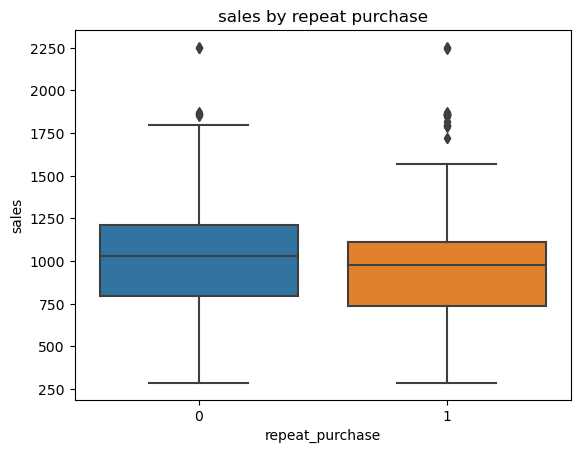

In [21]:
sns.boxplot(x="repeat_purchase", y="sales", data=data)
plt.title("sales by repeat purchase")

_Customers who don't repeat purchase(0) impacted more sales on average and their sales are more spreaded out. Because Customers who repeat purchase(1) have the smaller interquartile range, they have the most consistent results and will be the best for increasing sales but despite that,the majority of sales impacted by them may be lower than sales impacted by customers who don't repeat purchase._

_Some possibilities to explain high sales impacted by customers who don't repeat purchase is that they could be new customers, who may have higher spending habits than the existing customers or they tend to be more loyal to the brand and could be more likely to purchase more products at one time._

_Based on all of the above, we would recommend that the company focus on customers who repeat purchase for increasing their sales, but also keeps an open mind to customers who don't repeat purchases to make them buy products repeatedly by offering them loyalty rewards, discounts, and coupons for the next purchase and Making the purchasing process as simple and straightforward as possible._